In [22]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('simulated_pharmacy_data.csv')

df.head()

### Checking for missing value

In [9]:
df.isnull().sum()

date              0
medicine_name     0
category          0
quantity_sold     0
stock_on_hand     0
price_per_unit    0
expiry_date       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            5490 non-null   object 
 1   medicine_name   5490 non-null   object 
 2   category        5490 non-null   object 
 3   quantity_sold   5490 non-null   int64  
 4   stock_on_hand   5490 non-null   int64  
 5   price_per_unit  5490 non-null   float64
 6   expiry_date     5490 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 300.4+ KB


In [15]:
df["date"] = pd.to_datetime(df["date"])

### Top Medicines

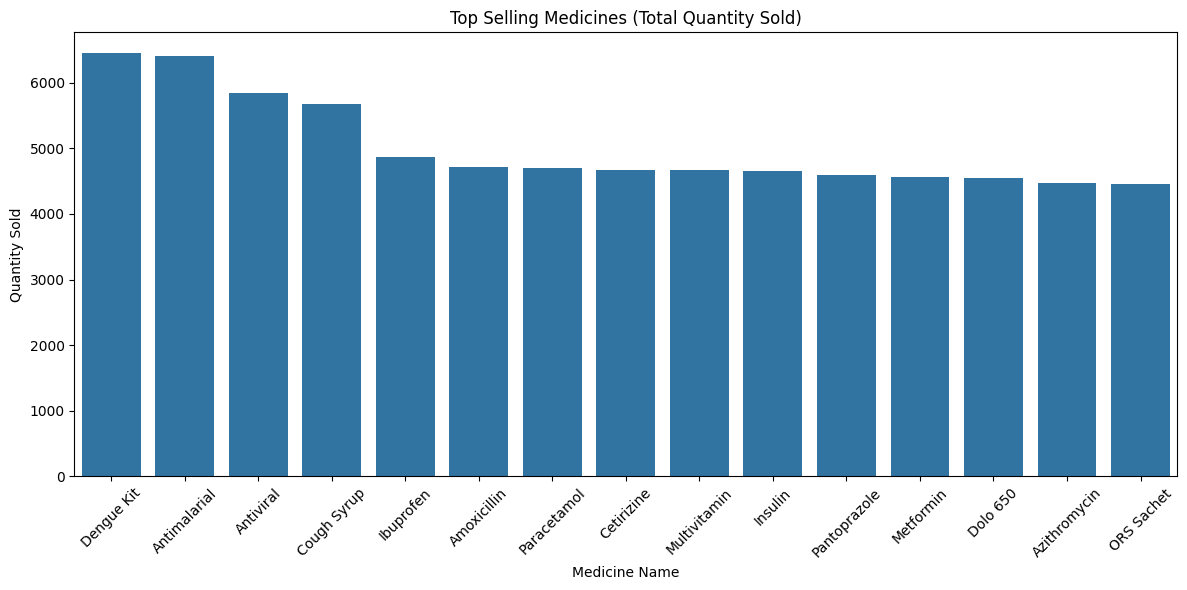

In [11]:
top_meds = df.groupby("medicine_name")["quantity_sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_meds.index, y=top_meds.values)
plt.xticks(rotation=45)
plt.title("Top Selling Medicines (Total Quantity Sold)")
plt.xlabel("Medicine Name")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

### Monthly Trends for a Specific Medicine (e.g., Paracetamol)

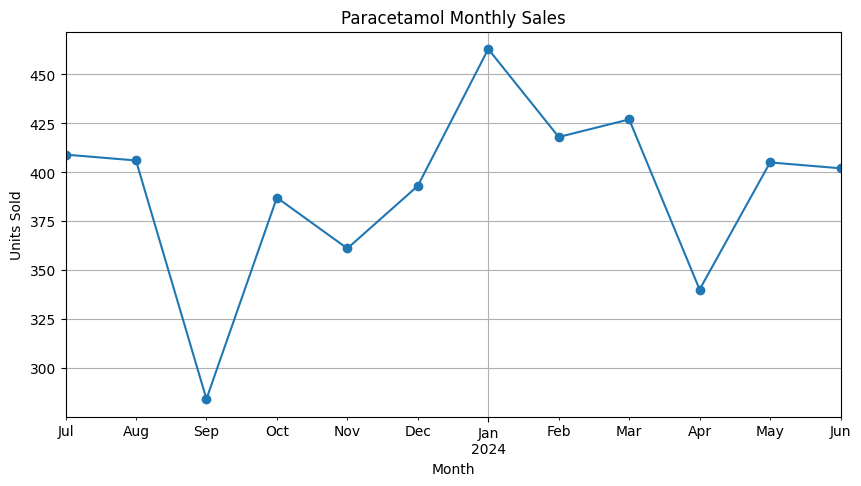

In [18]:
df['month'] = df['date'].dt.to_period('M')
monthly_sales = df[df["medicine_name"] == "Paracetamol"].groupby("month")["quantity_sold"].sum()

monthly_sales.plot(kind="line", marker="o", figsize=(10, 5), title="Paracetamol Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


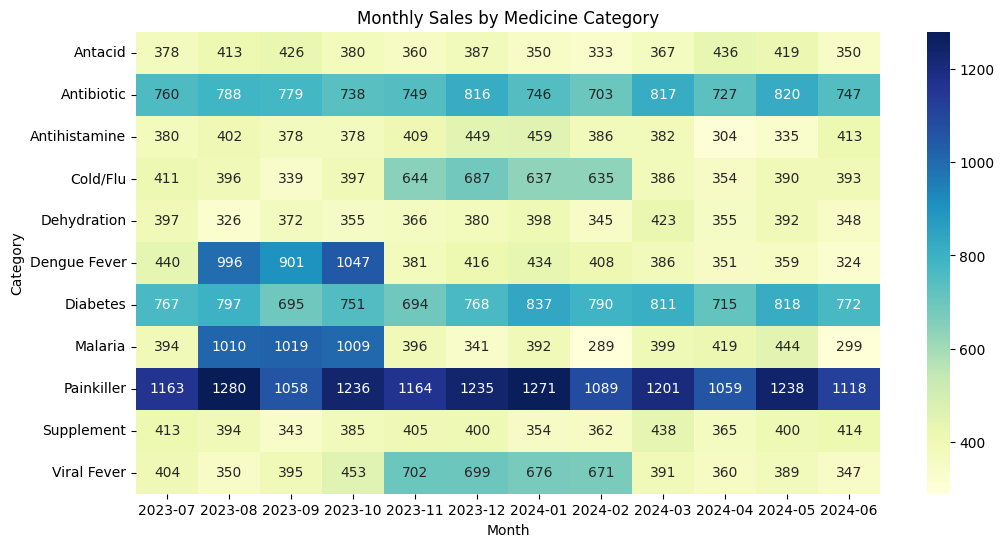

In [19]:
cat_monthly = df.groupby(["month", "category"])["quantity_sold"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(cat_monthly.T, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Monthly Sales by Medicine Category")
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()

### Low Stock Alert

In [20]:
low_stock = df[df["stock_on_hand"] < 100]
print("Entries with Stock Below 100 Units:\n", low_stock.head())

Entries with Stock Below 100 Units:
 Empty DataFrame
Columns: [date, medicine_name, category, quantity_sold, stock_on_hand, price_per_unit, expiry_date, month]
Index: []


### Near Expiry Medicines

In [25]:
df["expiry_date"] = pd.to_datetime(df["expiry_date"])
from datetime import datetime

df["expiry_date"] = pd.to_datetime(df["expiry_date"])

near_expiry = df[df["expiry_date"] < datetime(2024, 8, 1)]

print("Medicines Expiring Before August 2024:\n", near_expiry.head())

Medicines Expiring Before August 2024:
          date medicine_name     category  quantity_sold  stock_on_hand  \
0  2023-07-01   Paracetamol   Painkiller             18            982   
5  2023-07-01     Metformin     Diabetes             12            988   
8  2023-07-01   Cough Syrup     Cold/Flu             17            983   
13 2023-07-01     Antiviral  Viral Fever              5            995   
31 2023-07-03     Ibuprofen   Painkiller              4            996   

    price_per_unit expiry_date    month  
0              2.0  2024-06-11  2023-07  
5              2.5  2024-02-10  2023-07  
8              4.0  2023-12-31  2023-07  
13            10.0  2024-06-13  2023-07  
31             3.0  2024-07-16  2023-07  
